In [61]:
#importing packages

import pandas as pd
import numpy as np
import pickle as pck
import seaborn as sns
import matplotlib.pyplot as plt
import dabl as db
import missingno as msno
import joblib
from sklearn.impute import KNNImputer
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [55]:
#importing  train and test datasets

df_train = pd.read_csv("C:/Users/user8/Downloads/MGP Resources/train_dataset.csv");
df_test = pd.read_csv("C:/Users/user8/Downloads/MGP Resources/x_test.csv");
print(df_train.shape, df_test.shape)

(75757, 64) (9705, 63)


In [3]:
df_train.sample(5)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
42318,4,State_6,Residential,Multifamily_Uncategorized,53622.0,1986.0,19.0,42.7,4,28.596774,...,75,4,0,0,1.0,1.0,1.0,NaN,141.409494,42318
71092,5,State_11,Residential,2to4_Unit_Building,34590.0,1978.0,98.0,18.3,28,45.419355,...,40,2,0,0,NaN,NaN,NaN,NaN,17.366602,71092
61517,6,State_6,Residential,Multifamily_Uncategorized,123696.0,1962.0,NaN,42.7,11,34.451613,...,96,17,0,0,NaN,NaN,NaN,131.0,111.594262,61517
51891,5,State_6,Residential,Multifamily_Uncategorized,50676.0,2012.0,35.0,25.6,8,29.854839,...,106,12,0,0,330.0,340.0,18.3,148.0,74.090429,51891
71494,5,State_11,Commercial,Office_Uncategorized,25859.0,1982.0,82.0,18.3,28,45.419355,...,40,2,0,0,NaN,NaN,NaN,NaN,37.023365,71494


In [4]:
df_test.sample(5)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
6880,7,State_11,Commercial,Office_Uncategorized,757986.0,1980.0,97.0,26.5,21,38.661290,...,0,39,3,0,0,NaN,NaN,NaN,NaN,82637
9192,7,State_11,Residential,2to4_Unit_Building,57856.0,1984.0,68.0,812.0,21,38.661290,...,0,39,3,0,0,NaN,NaN,NaN,NaN,84949
5743,7,State_4,Commercial,Education_Other_classroom,82120.0,2003.0,32.0,178.0,-1,27.548387,...,5,79,12,0,0,NaN,NaN,NaN,NaN,81500
2093,7,State_8,Commercial,Warehouse_Nonrefrigerated,540000.0,1919.0,NaN,3.0,12,38.451613,...,0,102,22,0,0,330.0,350.0,17.9,129.0,77850
791,7,State_4,Commercial,Education_Other_classroom,71255.0,1987.0,38.0,182.9,-1,27.548387,...,5,79,12,0,0,NaN,NaN,NaN,NaN,76548


In [56]:
df_test['site_eui'] = np.nan
df_test['origin'] = "test"
df_train['origin'] = "train"

#for visualization, we combine train and test dts.
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)
df.sample(5)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,origin
84919,7,State_11,Residential,2to4_Unit_Building,20004.0,1972.0,NaN,812.0,21,38.661290,...,3,0,0,NaN,NaN,NaN,NaN,NaN,84919,test
20913,2,State_6,Residential,Multifamily_Uncategorized,82336.0,1992.0,NaN,3.4,13,37.322581,...,17,0,0,1.0,1.0,1.0,79.0,59.621135,20913,train
6211,4,State_2,Commercial,Office_Uncategorized,71350.0,1989.0,NaN,3.0,3,28.290323,...,17,0,0,NaN,NaN,NaN,NaN,94.533013,6211,train
65972,3,State_8,Commercial,Warehouse_Nonrefrigerated,59000.0,2000.0,100.0,3.0,4,32.903226,...,16,0,0,350.0,360.0,18.3,65.0,2.385046,65972,train
3572,5,State_1,Commercial,Office_Uncategorized,33193.0,1962.0,87.0,2.4,29,51.387097,...,52,10,0,NaN,NaN,NaN,NaN,17.221183,3572,train


In [6]:
#to check columns with missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85462 entries, 0 to 85461
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                85462 non-null  int64  
 1   State_Factor               85462 non-null  object 
 2   building_class             85462 non-null  object 
 3   facility_type              85462 non-null  object 
 4   floor_area                 85462 non-null  float64
 5   year_built                 83533 non-null  float64
 6   energy_star_rating         56499 non-null  float64
 7   ELEVATION                  85462 non-null  float64
 8   january_min_temp           85462 non-null  int64  
 9   january_avg_temp           85462 non-null  float64
 10  january_max_temp           85462 non-null  int64  
 11  february_min_temp          85462 non-null  int64  
 12  february_avg_temp          85462 non-null  float64
 13  february_max_temp          85462 non-null  int

In [7]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
    
df_missing = missing_values_table(df)
df_missing

Your selected dataframe has 65 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
days_with_fog,54913,64.3
direction_peak_wind_speed,50386,59.0
direction_max_wind_speed,49657,58.1
max_wind_speed,49657,58.1
energy_star_rating,28963,33.9
site_eui,9705,11.4
year_built,1929,2.3


In [8]:
df.duplicated().sum()
#so no duplicated records...

0

<AxesSubplot: >

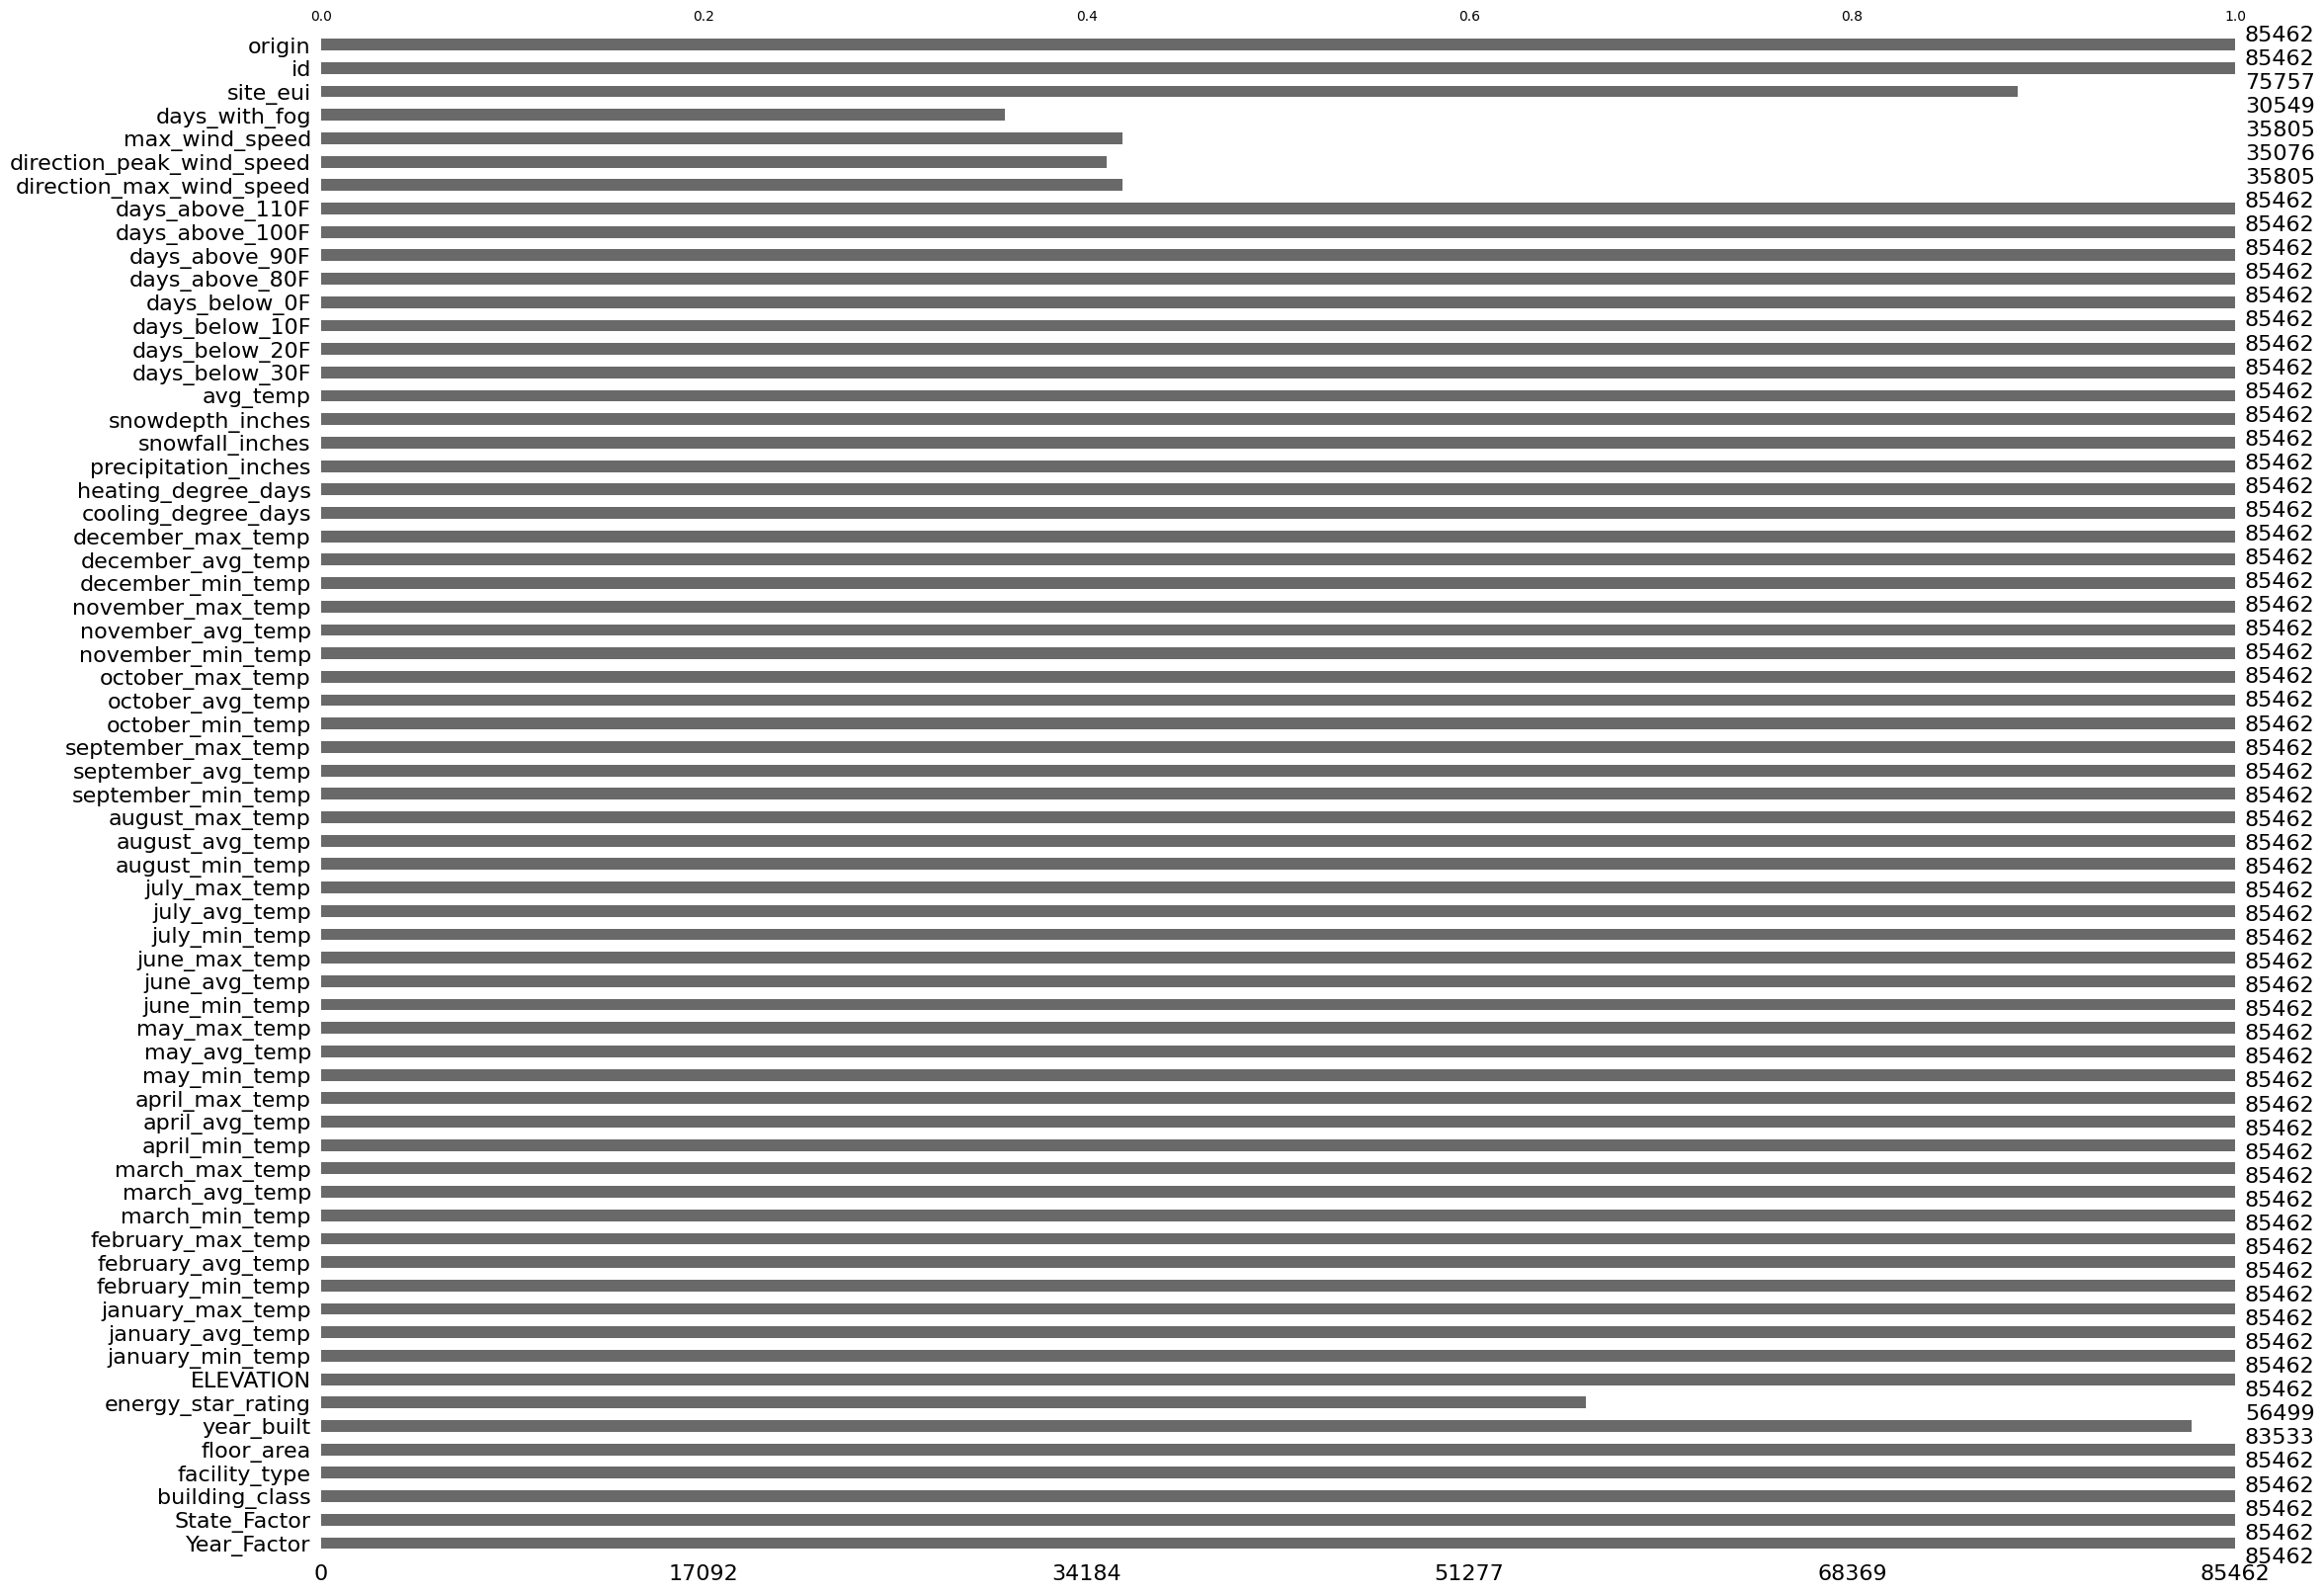

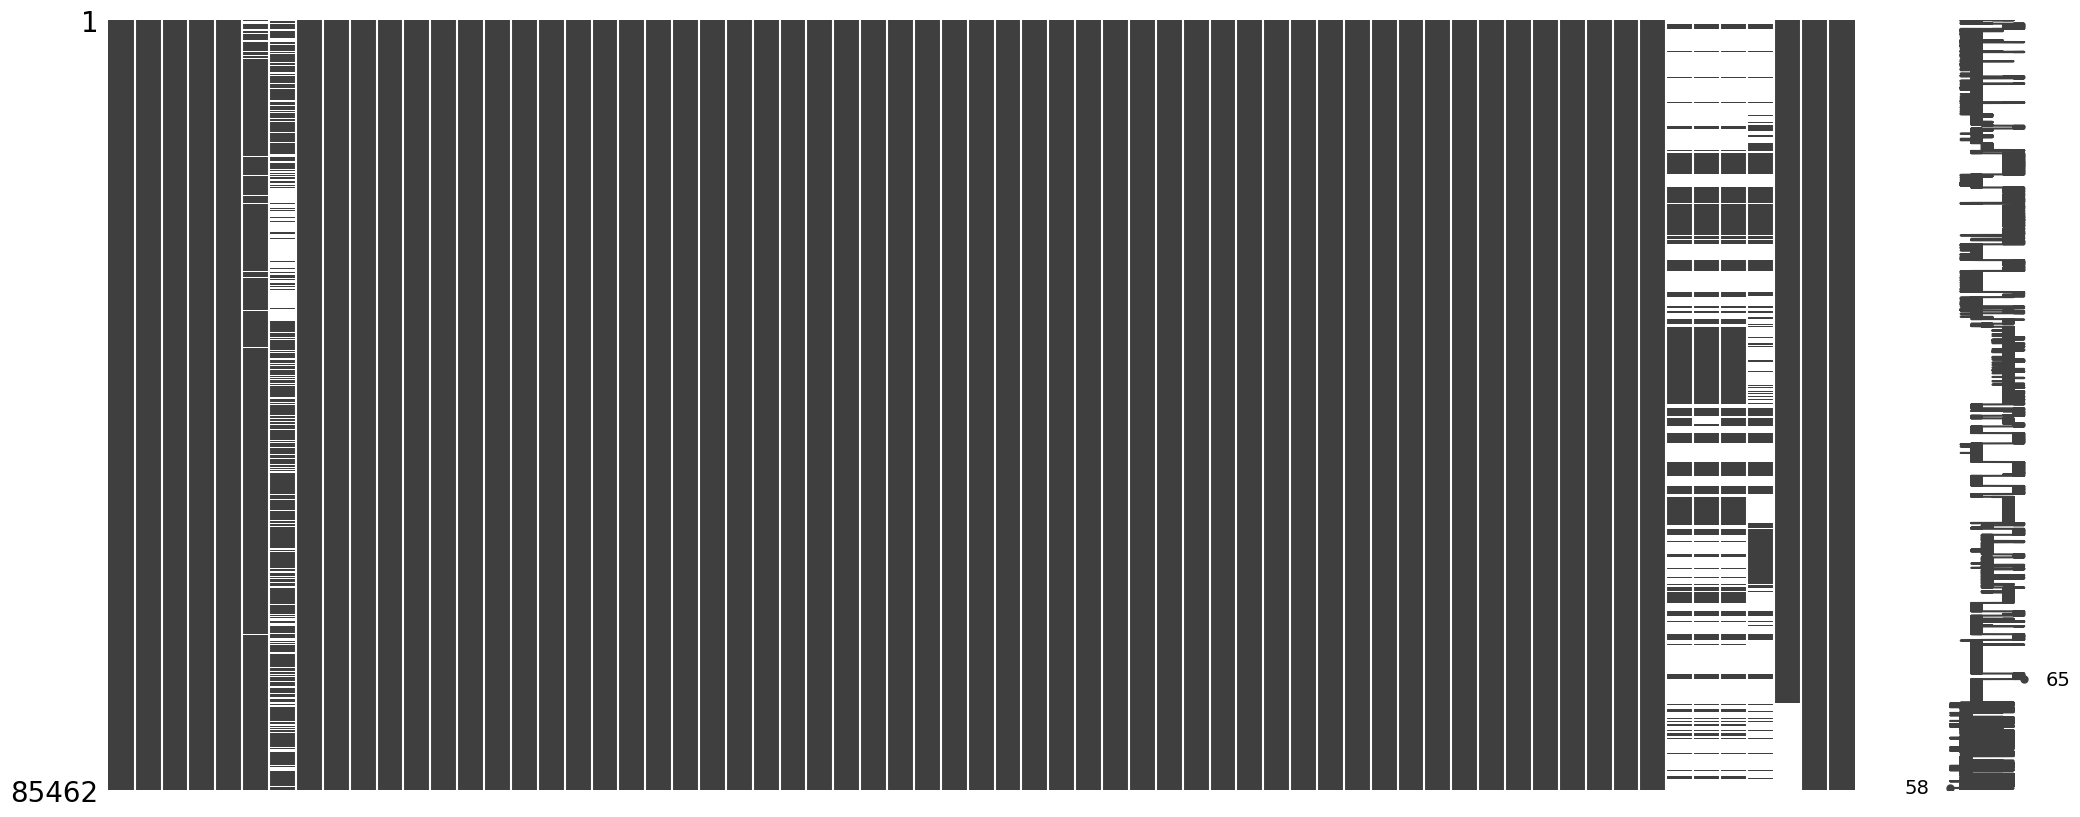

In [9]:
msno.bar(df)
msno.matrix(df)

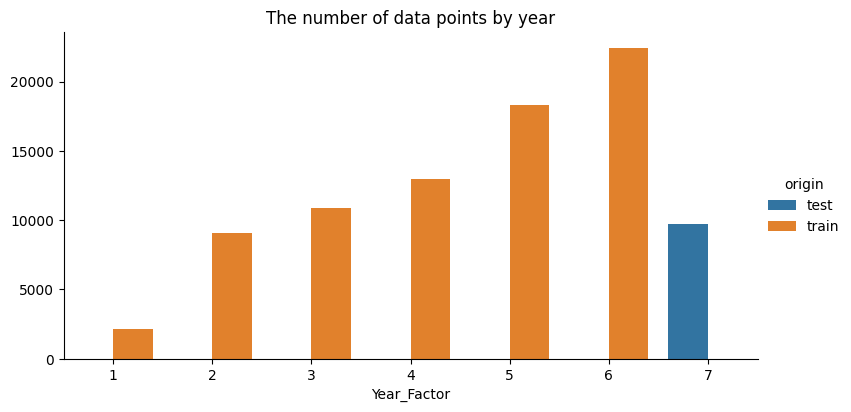

In [10]:
#getting year factor vs id bargraph
ax = sns.catplot(x='Year_Factor', 
                 y='id', 
                 data=df.groupby(['origin','Year_Factor']).agg({'id':'count'}).reset_index(),
                 hue='origin',
                 kind='bar',
                 aspect=2,
                 height=4).set(title="The number of data points by year", ylabel=None)

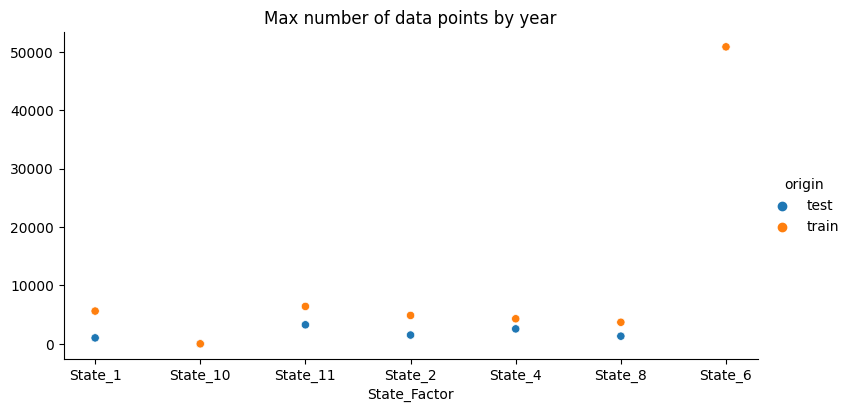

In [11]:
ax = sns.relplot(x='State_Factor', 
                 y='id', 
                 data=df.groupby(['origin','State_Factor']).agg({'id':'count'}).reset_index(),
                 hue='origin',
                 aspect=2,
                 height=4).set(title="Max number of data points by year", ylabel=None)

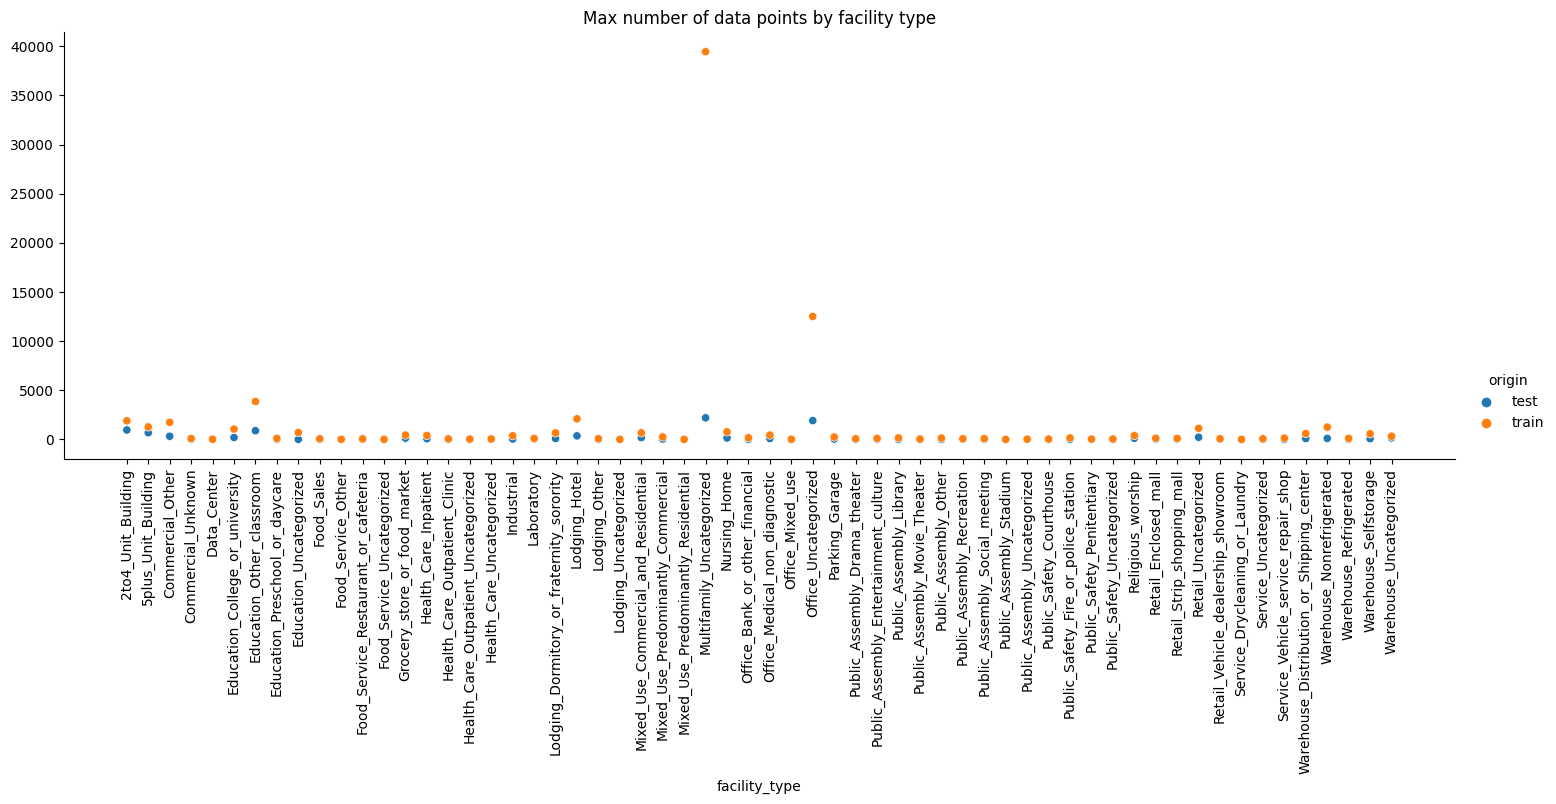

In [12]:
ax = sns.relplot(x='facility_type', 
                 y='id', 
                 data=df.groupby(['origin','facility_type']).agg({'id':'count'}).reset_index(),
                 hue='origin',
                 aspect=3,
                 height=5).set(title="Max number of data points by facility type", ylabel=None)
ax.set_xticklabels(rotation=90)

C:\Users\user8\AppData\Local\Temp\ipykernel_14276\2629861104.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='origin',
C:\Users\user8\AppData\Local\Temp\ipykernel_14276\2629861104.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='State_Factor',
C:\Users\user8\AppData\Local\Temp\ipykernel_14276\2629861104.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='State_Factor',


Text(0.5, 0, '')

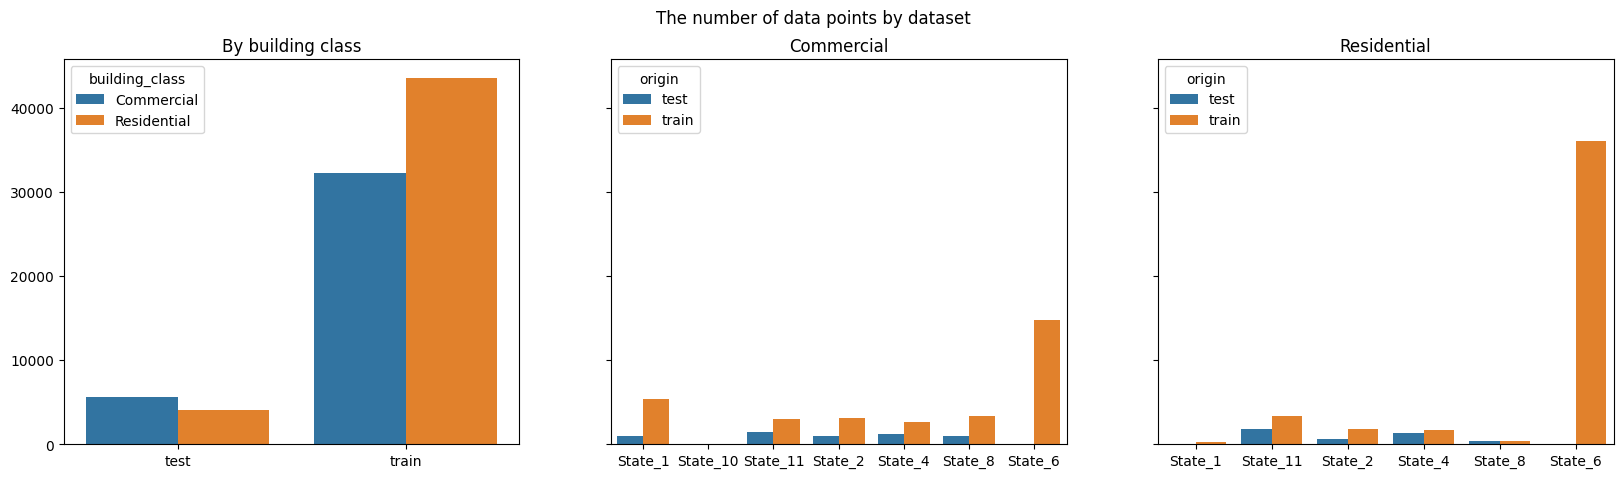

In [13]:
fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
fig.suptitle("The number of data points by dataset")

sns.barplot(x='origin',
            y='id',
            data=df.groupby(['origin','building_class']).agg({'id':'count'}).reset_index(),
            hue='building_class',
            ax=ax[0],
            ci=False)

for e, s in enumerate(df['building_class'].unique(),1):
    sns.barplot(x='State_Factor',
                y='id',
                data=df[df['building_class']==s].groupby(['origin','State_Factor']).agg({'id':'count'}).reset_index(),
                hue='origin',
                ax=ax[e],
                ci=False)
    ax[e].set_title(s)
    ax[e].set_ylabel("")
    ax[e].set_xlabel("")

ax[0].set_title("By building class")
ax[0].set_ylabel("")
ax[0].set_xlabel("")

#so most of commercial data points fall in state_6 and 
#almost all residential data points fall in state_6 too.

In [14]:
max(df['year_built'].value_counts().index)

2016.0

In [15]:
#replacing all the outlying year_built data points with some year for visualzation.
#replacing with 2029 coz 2016 is the latest year to have been recorded.
temp = df[['year_built']].fillna(2029).replace({0:2029}).astype('category').value_counts().reset_index().rename({0:'count'},axis=1)\
            .sort_values('year_built')

temp.sample(5)

,year_built,count
116,1896.0,95
15,1970.0,1175
94,1996.0,355
136,1884.0,20
63,1909.0,610


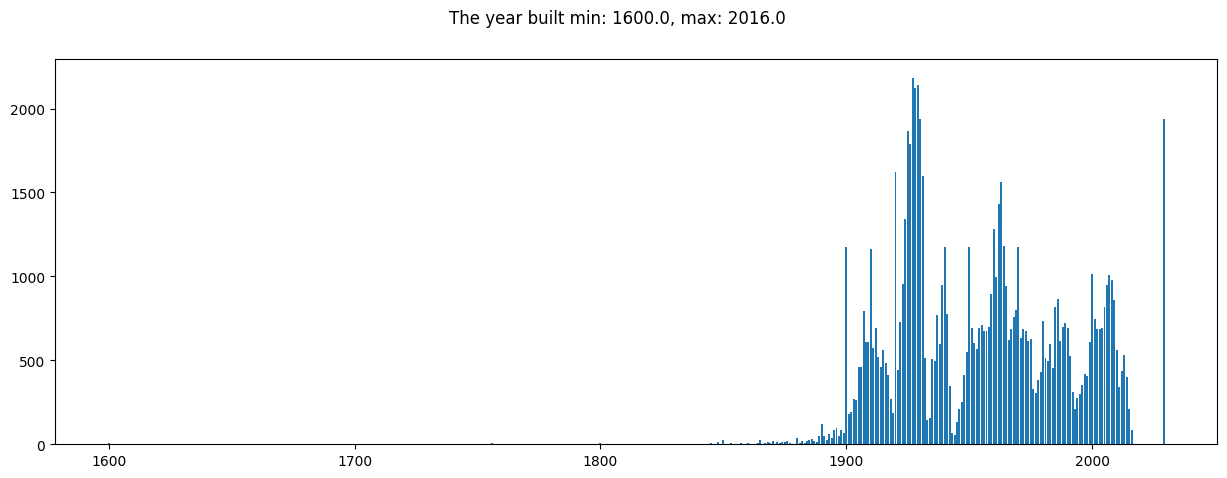

In [16]:
fig, ax = plt.subplots(figsize=(15,5))

ax=plt.bar(temp['year_built'],
           temp['count'])

fig.suptitle(f"The year built min: {min(temp['year_built'])}, max: {max(df['year_built'])}");
#not much site eui before 1900s since the no. of buildings were less.

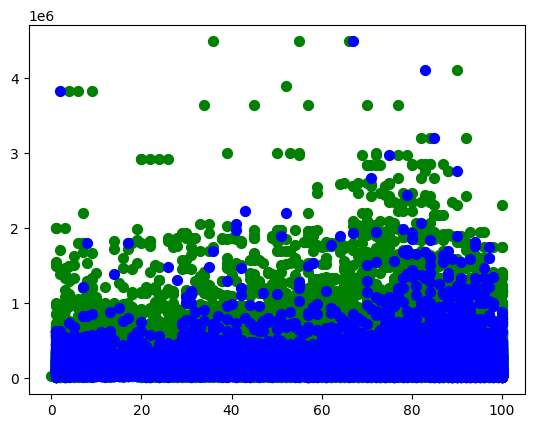

In [17]:
plt.scatter(df_train['energy_star_rating'],
            df_train['floor_area'], c ="green",
            linewidths = 1,
            marker ="o",
            s = 50)

plt.scatter(df_test['energy_star_rating'],
            df_test['floor_area'], c ="blue",
            linewidths = 1,
            marker ="o",
            s = 50)

#so train(green) dtst has more floor area datapoints than test dtst.
#also there's some correlation between floor area and energy star rating as seen from plot below.

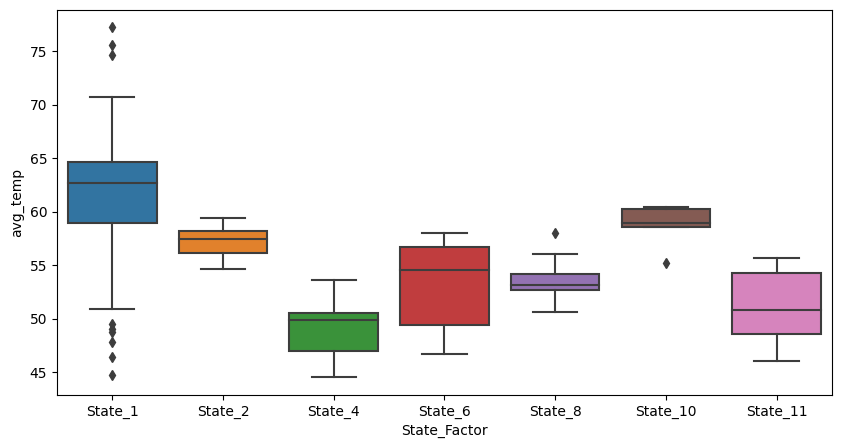

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=df[['avg_temp','State_Factor']].drop_duplicates(), y='avg_temp', x='State_Factor');

#so trend of states wrt to mean temp. 1 > 10 > 2 > 6 > 8 > 11 > 4
#also states 1, 6 and 11 have high range of temp.

c:\users\user8\appdata\local\programs\python\python38\lib\site-packages\dabl\plot\supervised.py:610: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."


Target looks like regression


c:\users\user8\appdata\local\programs\python\python38\lib\site-packages\dabl\plot\utils.py:678: UserWarning: Dropped 269 outliers in column site_eui.
  warn("Dropped {} outliers in column {}.".format(
c:\users\user8\appdata\local\programs\python\python38\lib\site-packages\dabl\plot\supervised.py:651: UserWarning: Discarding 269 outliers in target column.
  warn(f"Discarding {n_outliers} outliers in target column.",
c:\users\user8\appdata\local\programs\python\python38\lib\site-packages\dabl\plot\supervised.py:82: UserWarning: Missing values in target_col have been removed for regression
  warn("Missing values in target_col have been removed for regression",
c:\users\user8\appdata\local\programs\python\python38\lib\site-packages\dabl\plot\utils.py:678: UserWarning: Dropped 75 outliers in column site_eui.
  warn("Dropped {} outliers in column {}.".format(
c:\users\user8\appdata\local\programs\python\python38\lib\site-packages\dabl\plot\supervised.py:107: UserWarning: Not plotting highly 

[<AxesSubplot: title={'center': 'Target distribution'}, xlabel='site_eui', ylabel='frequency'>,
 array([[<AxesSubplot: title={'center': 'F=-6.60E-01'}, xlabel='energy_star_rating', ylabel='site_eui'>,
         <AxesSubplot: title={'center': 'F=2.64E-01'}, xlabel='snowfall_inches'>,
         <AxesSubplot: title={'center': 'F=-2.44E-01'}, xlabel='february_avg_temp'>,
         <AxesSubplot: title={'center': 'F=-2.37E-01'}, xlabel='january_min_temp'>,
         <AxesSubplot: title={'center': 'F=-2.31E-01'}, xlabel='february_max_temp'>],
        [<AxesSubplot: title={'center': 'F=2.27E-01'}, xlabel='july_min_temp', ylabel='site_eui'>,
         <AxesSubplot: title={'center': 'F=-2.17E-01'}, xlabel='march_min_temp'>,
         <AxesSubplot: title={'center': 'F=-2.17E-01'}, xlabel='march_avg_temp'>,
         <AxesSubplot: title={'center': 'F=-2.14E-01'}, xlabel='february_min_temp'>,
         <AxesSubplot: title={'center': 'F=2.00E-01'}, xlabel='july_avg_temp'>]],
       dtype=object),
 array([[<

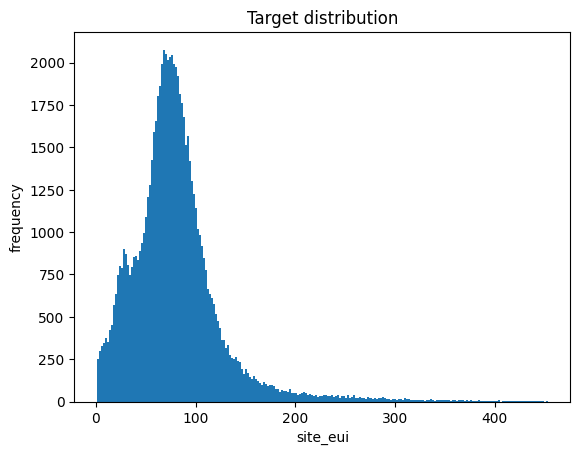

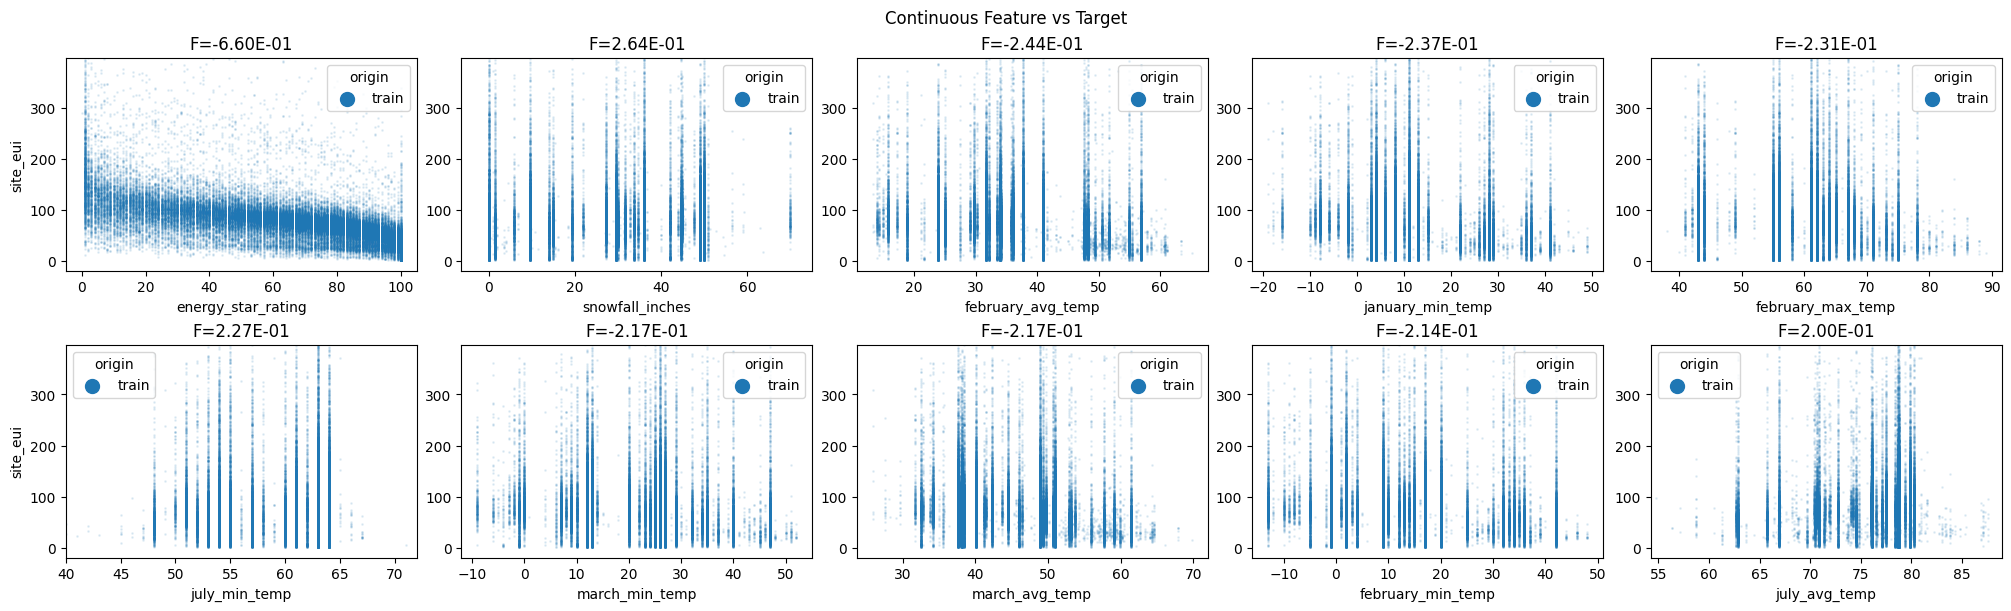

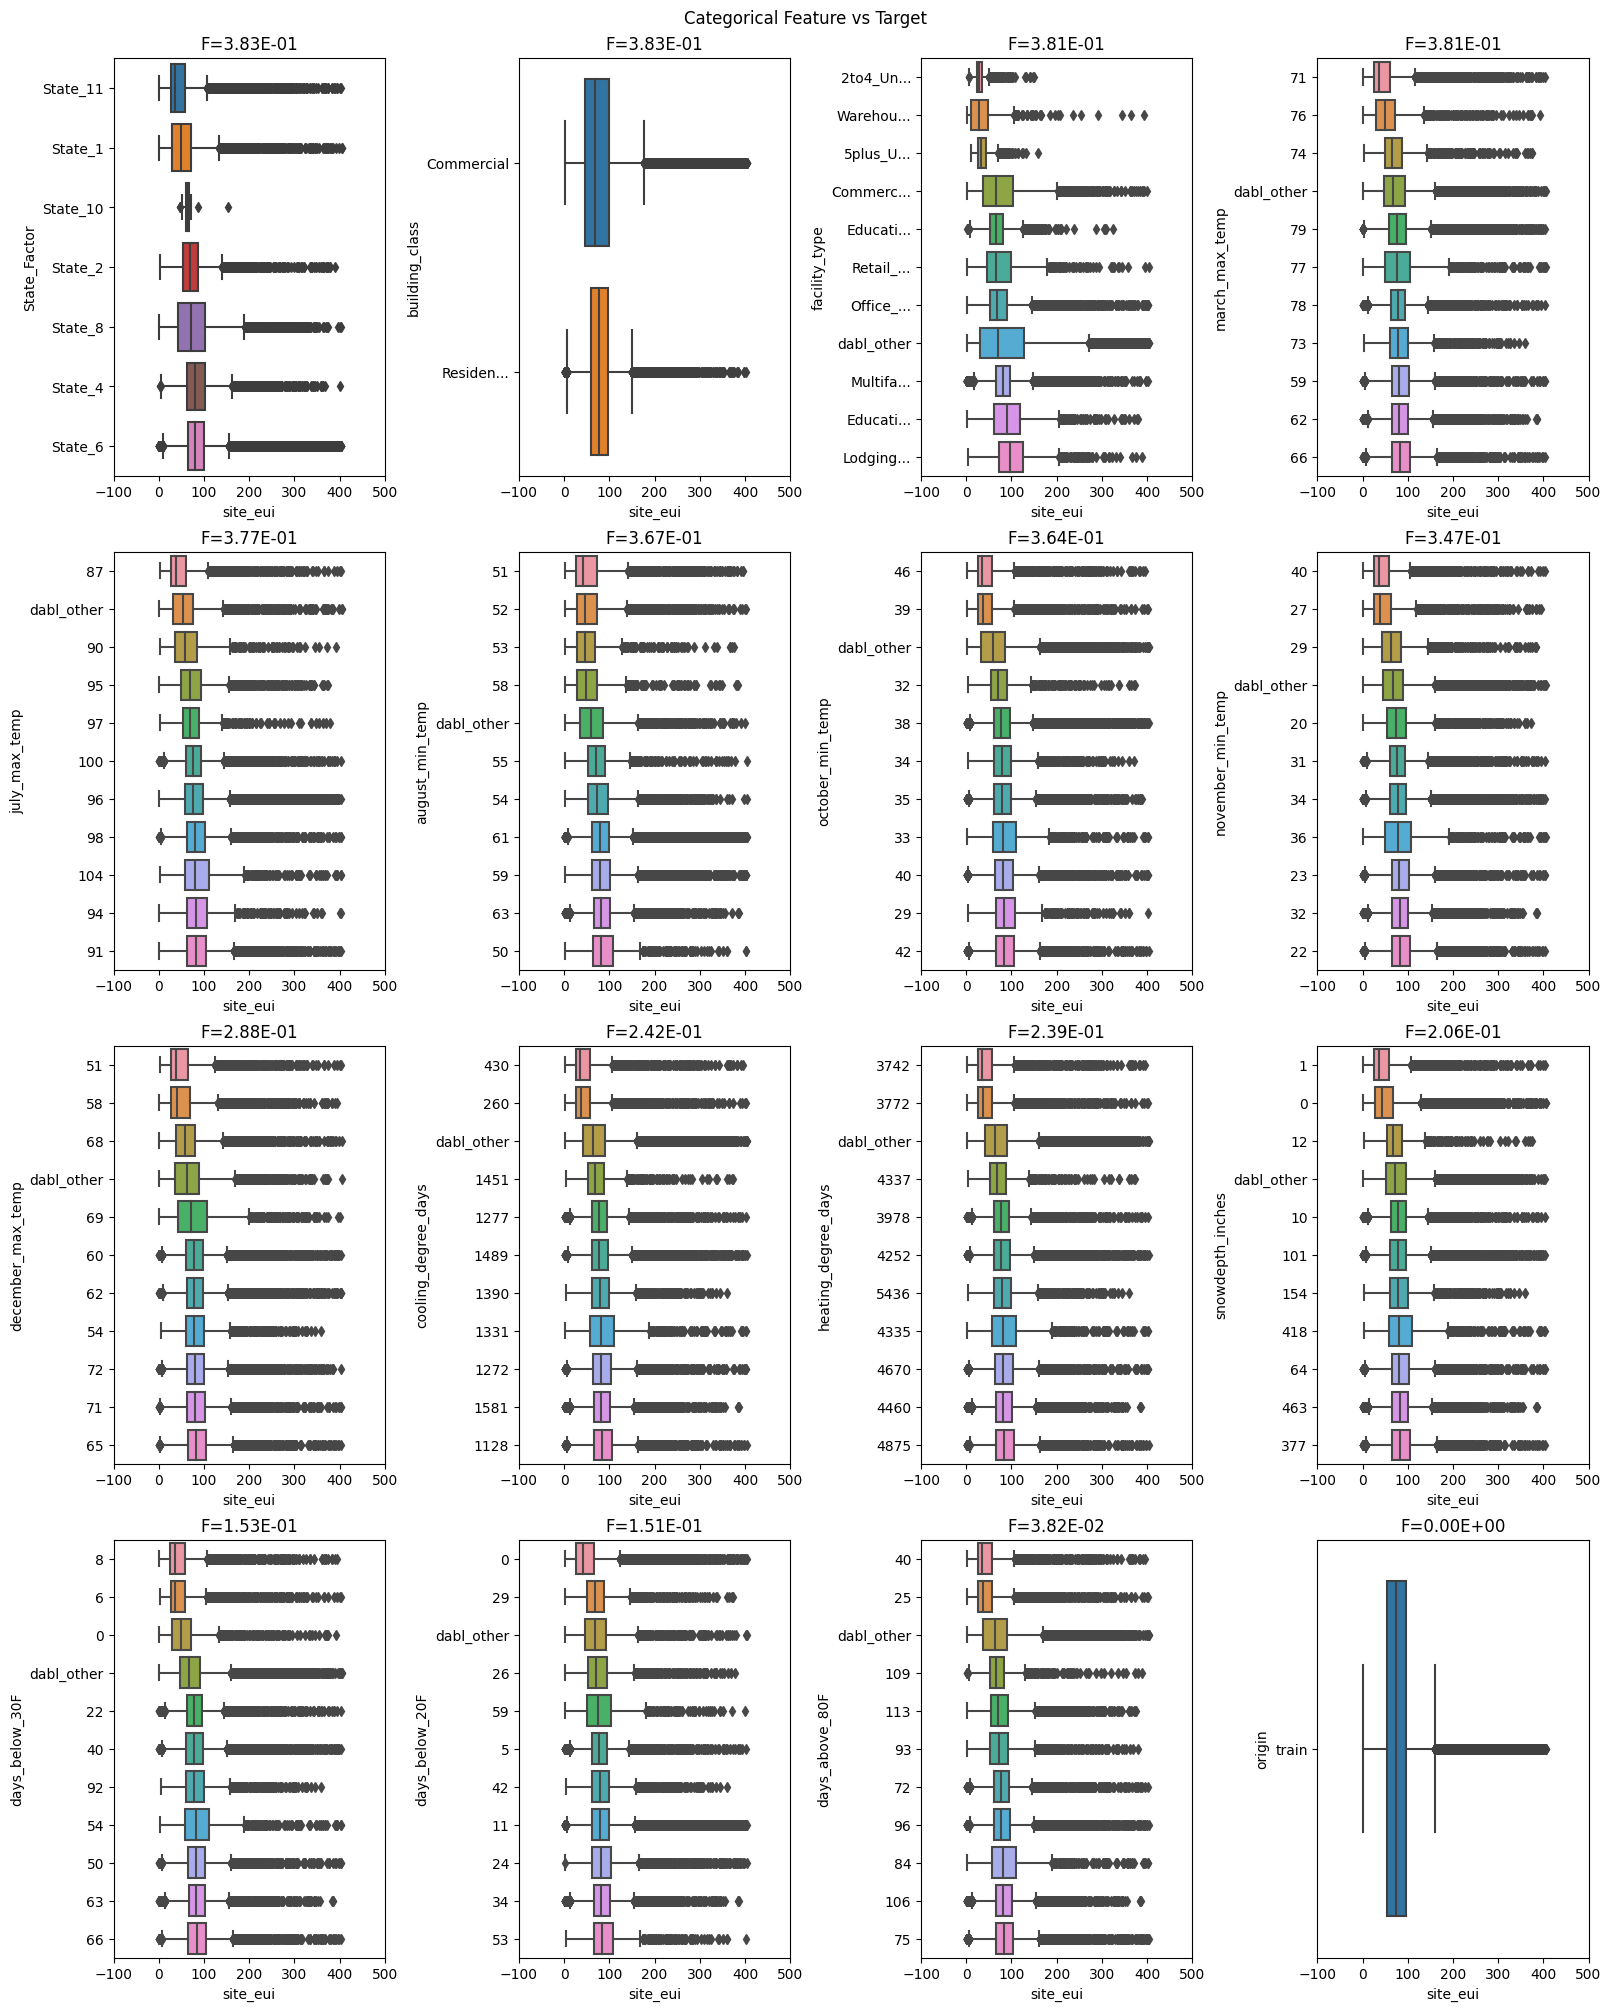

In [19]:
#getting target variable graphs wrt to every feature

db.plot(df, "site_eui")

[Text(0.5, 1.0, 'EUI by State'), Text(0, 0.5, '')]

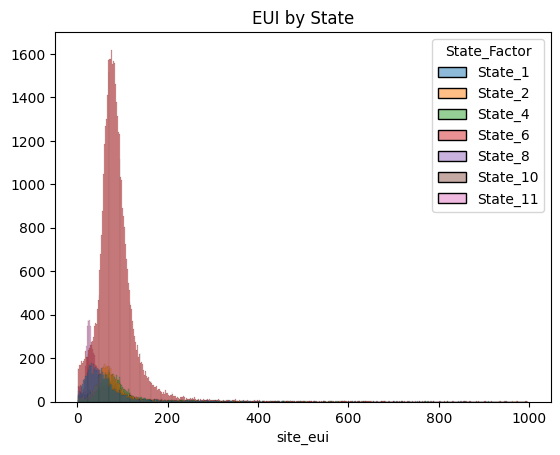

In [20]:
#interested in seeing the trends of site eui wrt
#states and building class becau

sns.histplot(df, x='site_eui', hue='State_Factor').set(title='EUI by State', ylabel=None)

[Text(0.5, 1.0, 'EUI by State'), Text(0, 0.5, '')]

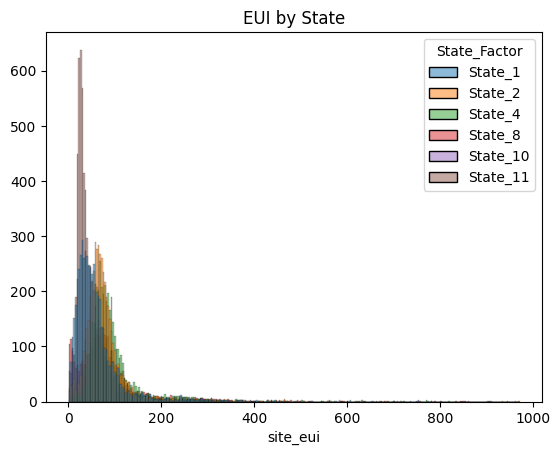

In [21]:
sns.histplot(df[df['State_Factor']!='State_6'], x='site_eui',hue='State_Factor').set(title='EUI by State', ylabel=None)

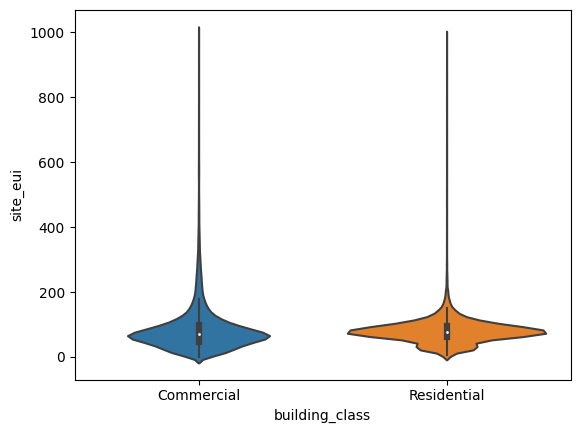

In [22]:
#so from plots above, we see that state 6 has highest site eui followed by state 11.
#all rest have similar eui

sns.violinplot(data=df, y='site_eui', x='building_class');

#more site eui in commercial class buildings

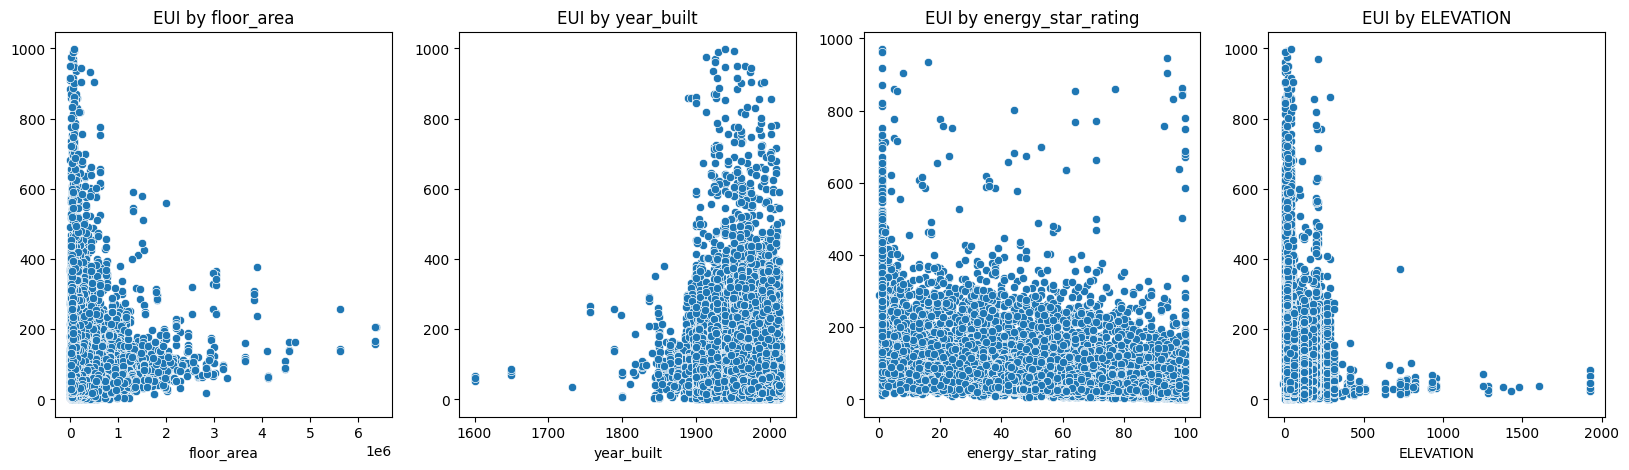

In [23]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

for e, col in enumerate(['floor_area', 'year_built', 'energy_star_rating', 'ELEVATION']):
    if col =='year_built':
        sns.scatterplot(data=df[(df['year_built']!=0) & (df['year_built'].notna())], 
                        x=col, y='site_eui', ax=ax[e]).set(title='EUI by '+ col, ylabel=None)
    else:
        sns.scatterplot(data=df, x=col, y='site_eui', ax=ax[e]).set(title='EUI by '+ col, ylabel=None);

In [24]:
# Observations:
#     1. state 6 has highest site eui followed by state 11 and then the rest with high differences
#     2. direction_max_wind_speed, direction_peak_wind_speed, max_wind_speed, days_with_fog features have more than 50% missing values, so, to be discarded.
#     3. there's some correlation between floor area and energy star rating
#     4. state 6 does not exist and state 10 has only 2 records in test dtst
#     5. 

In [57]:
#grouping these 6 columns because they might point towards the same building
#also these 6 features have some correlation to target site_eui

groupby_cols = ['State_Factor', 'Year_Factor', 'building_class','facility_type','floor_area','year_built']
df = df.sort_values(by=groupby_cols).reset_index(drop=True)

In [26]:
#now performing One Hot Encoding on categorical features except origin
#categorical features will be of object type

# cate_cols = list(df.loc[:,df.dtypes=='object'].columns)
# cate_cols.remove('origin')

# for col in cate_cols:
#     dummies = pd.get_dummies(df[col], dummy_na=False)
#     for ohe_col in dummies:
#         df[f'ohe_{col}_{ohe_col}'] = dummies[ohe_col]

In [27]:
df

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,ohe_facility_type_Retail_Uncategorized,ohe_facility_type_Retail_Vehicle_dealership_showroom,ohe_facility_type_Service_Drycleaning_or_Laundry,ohe_facility_type_Service_Uncategorized,ohe_facility_type_Service_Vehicle_service_repair_shop,ohe_facility_type_Warehouse_Distribution_or_Shipping_center,ohe_facility_type_Warehouse_Nonrefrigerated,ohe_facility_type_Warehouse_Refrigerated,ohe_facility_type_Warehouse_Selfstorage,ohe_facility_type_Warehouse_Uncategorized
0,1,State_1,Commercial,Commercial_Other,50212.0,1925.0,NaN,45.7,36,50.500000,...,0,0,0,0,0,0,0,0,0,0
1,1,State_1,Commercial,Commercial_Other,50540.0,1909.0,NaN,45.7,36,50.500000,...,0,0,0,0,0,0,0,0,0,0
2,1,State_1,Commercial,Commercial_Other,51276.0,1957.0,NaN,120.1,36,50.500000,...,0,0,0,0,0,0,0,0,0,0
3,1,State_1,Commercial,Commercial_Other,53000.0,1924.0,NaN,2.4,36,50.500000,...,0,0,0,0,0,0,0,0,0,0
4,1,State_1,Commercial,Commercial_Other,90377.0,1937.0,NaN,120.1,36,50.500000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85457,7,State_8,Residential,Multifamily_Uncategorized,852000.0,2009.0,59.0,130.8,2,33.435484,...,0,0,0,0,0,0,0,0,0,0
85458,7,State_8,Residential,Multifamily_Uncategorized,878176.0,2005.0,100.0,3.0,2,33.435484,...,0,0,0,0,0,0,0,0,0,0
85459,7,State_8,Residential,Multifamily_Uncategorized,900000.0,1960.0,90.0,130.8,2,33.435484,...,0,0,0,0,0,0,0,0,0,0
85460,7,State_8,Residential,Multifamily_Uncategorized,1179072.0,1959.0,92.0,130.8,2,33.435484,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85462 entries, 0 to 85461
Columns: 134 entries, Year_Factor to ohe_facility_type_Warehouse_Uncategorized
dtypes: float64(24), int64(37), object(4), uint8(69)
memory usage: 48.0+ MB


In [58]:
#imputing every feature using KNN Imputation except origin, target and the categorical features
#and storing the obtained dataframe and imputer object as pickle file for future use

knn_imp = False

if knn_imp:
    knn = KNNImputer(n_neighbors=15)
    tmp = df[['State_Factor', 'building_class', 'facility_type', 'origin', 'site_eui']]
    df1 = df.drop(tmp.columns, axis=1)
    df_knn = pd.DataFrame(knn.fit_transform(df1),columns = df1.columns)
    
    tmp.to_csv('C:/Users/user8/Downloads/MGP Resources/Project 2/data/imputer_tmp.csv', index=False)
    df_knn.to_csv('C:/Users/user8/Downloads/MGP Resources/Project 2/data/imputer_df_knn.csv', index=False)
    joblib.dump(knn, 'C:/Users/user8/Downloads/MGP Resources/Project 2/models/knn_imputer_obj.pkl')
    
else:
    #reading from the imputer csv file saved earlier
    df_knn = pd.read_csv('C:/Users/user8/Downloads/MGP Resources/Project 2/data/imputer_df_knn.csv')
    tmp = df[['State_Factor', 'building_class', 'facility_type', 'origin', 'site_eui']]
    df = df.drop(tmp.columns, axis=1)
    
    for col in tmp.columns:
        df[col]=tmp[col]
    for col in df_knn.columns:
        df[col] = df_knn[col]

C:\Users\user8\AppData\Local\Temp\ipykernel_14276\3463145752.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = df_knn[col]
C:\Users\user8\AppData\Local\Temp\ipykernel_14276\3463145752.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = df_knn[col]
C:\Users\user8\AppData\Local\Temp\ipykernel_14276\3463145752.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

In [63]:
cats = ['State_Factor', 'building_class', 'facility_type']

for col in cats:
    encoder = TargetEncoder()
    df[f'te_{col}'] = encoder.fit_transform(df[col], df['site_eui'])

C:\Users\user8\AppData\Local\Temp\ipykernel_14276\3598147912.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'te_{col}'] = encoder.fit_transform(df[col], df['site_eui'])
C:\Users\user8\AppData\Local\Temp\ipykernel_14276\3598147912.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'te_{col}'] = encoder.fit_transform(df[col], df['site_eui'])
C:\Users\user8\AppData\Local\Temp\ipykernel_14276\3598147912.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

In [65]:
df_missing = missing_values_table(df)
df_missing
#only missing values in site_eui but that's okay

Your selected dataframe has 137 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
site_eui,9705,11.4


In [66]:
# extract new weather statistics from the building location weather features

temp = [col for col in df.columns if 'temp' in col]

print(temp)

['january_min_temp', 'january_avg_temp', 'january_max_temp', 'february_min_temp', 'february_avg_temp', 'february_max_temp', 'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp', 'august_max_temp', 'september_min_temp', 'september_avg_temp', 'september_max_temp', 'october_min_temp', 'october_avg_temp', 'october_max_temp', 'november_min_temp', 'november_avg_temp', 'november_max_temp', 'december_min_temp', 'december_avg_temp', 'december_max_temp', 'avg_temp']


In [67]:
df['min_temp'] = df[temp].min(axis=1)
df['max_temp'] = df[temp].max(axis=1)
df['std_temp'] = df[temp].std(axis=1)
df['skew_temp'] = df[temp].skew(axis=1)

temp = [col for col in df.columns if 'temp' in col]
print(temp)

['january_min_temp', 'january_avg_temp', 'january_max_temp', 'february_min_temp', 'february_avg_temp', 'february_max_temp', 'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp', 'august_max_temp', 'september_min_temp', 'september_avg_temp', 'september_max_temp', 'october_min_temp', 'october_avg_temp', 'october_max_temp', 'november_min_temp', 'november_avg_temp', 'november_max_temp', 'december_min_temp', 'december_avg_temp', 'december_max_temp', 'avg_temp', 'min_temp', 'max_temp', 'std_temp', 'skew_temp']


In [68]:
temp_series = pd.Series([col for col in df.columns if 'temp' in col])


winter_temp = temp_series[temp_series.apply(lambda x: ('january' in x or 'february' in x or 'december' in x))].values
spring_temp = temp_series[temp_series.apply(lambda x: ('march' in x or 'april' in x or 'may' in x))].values
summer_temp = temp_series[temp_series.apply(lambda x: ('june' in x or 'july' in x or 'august' in x))].values
autumn_temp = temp_series[temp_series.apply(lambda x: ('september' in x or 'october' in x or 'november' in x))].values

### winter
df['min_winter_temp'] = df[winter_temp].min(axis=1)
df['max_winter_temp'] = df[winter_temp].max(axis=1)
df['avg_winter_temp'] = df[winter_temp].mean(axis=1)
df['std_winter_temp'] = df[winter_temp].std(axis=1)
df['skew_winter_temp'] = df[winter_temp].skew(axis=1)
### spring
df['min_spring_temp'] = df[spring_temp].min(axis=1)
df['max_spring_temp'] = df[spring_temp].max(axis=1)
df['avg_spring_temp'] = df[spring_temp].mean(axis=1)
df['std_spring_temp'] = df[spring_temp].std(axis=1)
df['skew_spring_temp'] = df[spring_temp].skew(axis=1)
### summer
df['min_summer_temp'] = df[summer_temp].min(axis=1)
df['max_summer_temp'] = df[summer_temp].max(axis=1)
df['avg_summer_temp'] = df[summer_temp].mean(axis=1)
df['std_summer_temp'] = df[summer_temp].max(axis=1)
df['skew_summer_temp'] = df[summer_temp].max(axis=1)
## autumn
df['min_autumn_temp'] = df[autumn_temp].min(axis=1)
df['max_autumn_temp'] = df[autumn_temp].max(axis=1)
df['avg_autumn_temp'] = df[autumn_temp].mean(axis=1)
df['std_autumn_temp'] = df[autumn_temp].std(axis=1)
df['skew_autumn_temp'] = df[autumn_temp].skew(axis=1)

In [69]:
temp_series = pd.Series([col for col in df.columns if 'temp' in col])

print(temp_series)

0      january_min_temp
1      january_avg_temp
2      january_max_temp
3     february_min_temp
4     february_avg_temp
            ...        
56      min_autumn_temp
57      max_autumn_temp
58      avg_autumn_temp
59      std_autumn_temp
60     skew_autumn_temp
Length: 61, dtype: object


In [70]:
#now modifying building related columns

df['building_area'] = df['floor_area']*df['ELEVATION']

In [71]:
df

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,max_summer_temp,avg_summer_temp,std_summer_temp,skew_summer_temp,min_autumn_temp,max_autumn_temp,avg_autumn_temp,std_autumn_temp,skew_autumn_temp,building_area
0,1.0,50212.0,1925.0,80.200000,45.7,36.0,50.500000,68.0,35.0,50.589286,...,90.0,66.487455,90.0,90.0,43.0,90.0,63.162903,16.101723,0.508062,2294688.4
1,1.0,50540.0,1909.0,85.333333,45.7,36.0,50.500000,68.0,35.0,50.589286,...,90.0,66.487455,90.0,90.0,43.0,90.0,63.162903,16.101723,0.508062,2309678.0
2,1.0,51276.0,1957.0,88.333333,120.1,36.0,50.500000,68.0,35.0,50.589286,...,90.0,66.487455,90.0,90.0,43.0,90.0,63.162903,16.101723,0.508062,6158247.6
3,1.0,53000.0,1924.0,83.933333,2.4,36.0,50.500000,68.0,35.0,50.589286,...,90.0,66.487455,90.0,90.0,43.0,90.0,63.162903,16.101723,0.508062,127200.0
4,1.0,90377.0,1937.0,72.133333,120.1,36.0,50.500000,68.0,35.0,50.589286,...,90.0,66.487455,90.0,90.0,43.0,90.0,63.162903,16.101723,0.508062,10854277.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85457,7.0,852000.0,2009.0,59.000000,130.8,2.0,33.435484,61.0,16.0,37.660714,...,91.0,69.992399,91.0,91.0,17.0,91.0,55.995818,24.752362,-0.095805,111441600.0
85458,7.0,878176.0,2005.0,100.000000,3.0,2.0,33.435484,61.0,16.0,37.660714,...,91.0,69.992399,91.0,91.0,17.0,91.0,55.995818,24.752362,-0.095805,2634528.0
85459,7.0,900000.0,1960.0,90.000000,130.8,2.0,33.435484,61.0,16.0,37.660714,...,91.0,69.992399,91.0,91.0,17.0,91.0,55.995818,24.752362,-0.095805,117720000.0
85460,7.0,1179072.0,1959.0,92.000000,130.8,2.0,33.435484,61.0,16.0,37.660714,...,91.0,69.992399,91.0,91.0,17.0,91.0,55.995818,24.752362,-0.095805,154222617.6


In [72]:
#saving the dataframe as a csv

saved = True

if saved:
    df = pd.read_csv("C:/Users/user8/Downloads/MGP Resources/Project 2/data/final_feature_dataset.csv");
else:
    df.to_csv("C:/Users/user8/Downloads/MGP Resources/Project 2/data/final_feature_dataset.csv", index=False)

In [73]:
df.shape

(85462, 159)

In [74]:
cats = ['State_Factor', 'facility_type', 'building_class', 'days_above_100F', 'days_above_110F', 'origin', 'id', 'site_eui']

for col in df.drop(columns=cats).columns:
    df[col] = df[col].astype('float64')

In [75]:
train = df[df['origin']=='train'].reset_index(drop=True)
test = df[df['origin']=='test'].reset_index(drop=True)

test_ids = test['id']
train_ids = train['id']

target_col = train['site_eui'] #y_train

train = train.drop(['id', 'origin', 'site_eui'], axis=1) #X_train
test = test.drop(['id', 'origin', 'site_eui'], axis=1) #X_test

In [76]:
cats_discrete_idx = np.where(train.dtypes != 'float64')[0]

print("Label Encoded Columns:")
for i in cats_discrete_idx:
    print(train.columns[i])

Label Encoded Columns:
State_Factor
building_class
facility_type


In [77]:
le = LabelEncoder()
for col_idx in cats_discrete_idx:
    train.iloc[:, col_idx] = le.fit_transform(train.iloc[:, col_idx].astype(str))
    test.iloc[:, col_idx] = le.transform(test.iloc[:, col_idx].astype(str))

C:\Users\user8\AppData\Local\Temp\ipykernel_14276\4089216693.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.iloc[:, col_idx] = le.fit_transform(train.iloc[:, col_idx].astype(str))
C:\Users\user8\AppData\Local\Temp\ipykernel_14276\4089216693.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test.iloc[:, col_idx] = le.transform(test.iloc[:, col_idx].astype(str))


In [78]:
train.sample(5)

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,max_summer_temp,avg_summer_temp,std_summer_temp,skew_summer_temp,min_autumn_temp,max_autumn_temp,avg_autumn_temp,std_autumn_temp,skew_autumn_temp,building_area
58153,5.0,230404.0,1956.0,84.0,21.3,8.0,29.854839,56.0,2.0,23.946429,...,96.0,76.326822,96.0,96.0,32.0,97.0,61.920191,21.052041,0.064321,4907605.2
50556,5.0,360869.0,2010.0,62.0,21.3,8.0,29.854839,56.0,2.0,23.946429,...,96.0,76.326822,96.0,96.0,32.0,97.0,61.920191,21.052041,0.064321,7686509.7
69632,6.0,123646.0,1996.0,42.0,42.7,11.0,34.451613,59.0,-1.0,37.706897,...,96.0,76.233871,96.0,96.0,34.0,91.0,61.591637,19.839052,0.086495,5279684.2
44843,4.0,80565.0,1928.0,88.0,42.7,4.0,28.596774,58.0,9.0,31.625000,...,91.0,74.679032,91.0,91.0,22.0,92.0,58.740263,20.984169,-0.204013,3440125.5
6142,5.0,90583.0,2008.0,43.0,18.3,28.0,45.419355,63.0,32.0,48.321429,...,96.0,70.600657,96.0,96.0,27.0,80.0,54.711111,16.332372,-0.022392,1657668.9


In [79]:
test.sample(5)

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,max_summer_temp,avg_summer_temp,std_summer_temp,skew_summer_temp,min_autumn_temp,max_autumn_temp,avg_autumn_temp,std_autumn_temp,skew_autumn_temp,building_area
669,7.0,205964.0,1914.0,92.0,18.6,38.0,50.596774,64.0,40.0,54.482143,...,97.0,68.918100,97.0,97.0,43.0,104.0,66.778913,19.843743,0.883927,3830930.4
8325,7.0,674750.0,2010.0,79.0,241.4,-1.0,27.548387,59.0,9.0,36.053571,...,94.0,69.976822,94.0,94.0,16.0,95.0,54.144026,25.398108,0.197854,162884650.0
6514,7.0,51000.0,1976.0,5.0,197.5,-1.0,27.548387,59.0,9.0,36.053571,...,94.0,69.976822,94.0,94.0,16.0,95.0,54.144026,25.398108,0.197854,10072500.0
5312,7.0,59616.0,1965.0,17.0,15.2,15.0,41.177419,71.0,22.0,45.685185,...,98.0,76.759857,98.0,98.0,25.0,91.0,61.112302,22.271759,-0.242805,906163.2
1573,7.0,148022.0,1996.0,80.0,812.0,21.0,38.661290,54.0,28.0,41.625000,...,93.0,68.593489,93.0,93.0,30.0,90.0,55.962306,18.626657,0.443089,120193864.0


In [80]:
y_test = pd.read_csv("C:/Users/user8/Downloads/MGP Resources/y_test.csv")

X_train = train
X_test = test
y_train = target_col
y_test = y_test['site_eui']
print('Train: ', X_train.shape)
print('Test:', X_test.shape)
print('Samples: ', y_train.shape)
print('Targets: ', y_test.shape)

Train:  (75757, 156)
Test: (9705, 156)
Samples:  (75757,)
Targets:  (9705,)


In [81]:
catb = CatBoostRegressor(iterations=500,
                         learning_rate=0.02,
                         depth=12,
                         eval_metric='RMSE',
                         random_seed = 23,
                         bagging_temperature = 0.2,
                         od_type='Iter',
                         metric_period = 75, 
                         od_wait=100
                        )

catb.fit(X_train, y_train,
                 eval_set=(X_test,y_test),
                 cat_features=cats_discrete_idx,
                 use_best_model=True,
                 verbose=True)

y_pred = catb.predict(X_test)

0:	learn: 57.8927510	test: 61.1841368	best: 61.1841368 (0)	total: 461ms	remaining: 3m 50s
75:	learn: 45.1845392	test: 68.3571265	best: 61.1841368 (0)	total: 34.6s	remaining: 3m 12s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 61.18413678
bestIteration = 0

Shrink model to first 1 iterations.


In [82]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 61.18413680682576
 MAE: 40.27135891836136
 R2: -0.035351904132068235


In [83]:
xgb = XGBRegressor(n_estimators=500, reg_alpha=0.01, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 97.61626811071646
 MAE: 70.74245786159949
 R2: -1.6354495853647926


In [85]:
rf = RandomForestRegressor(random_state=1, criterion='mse', max_depth = 15, min_samples_split= 2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

c:\users\user8\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


 Training data scores
 --------------------
 RMSE: 76.52367590866776
 MAE: 49.94112598122894
 R2: -0.6195783376999484


In [95]:
c=0; error=0

for i in range(0,len(list(y_pred))):
    if(round(list(y_pred)[i])==round(list(y_test)[i])):
        c+=1
    else:
        error += list(y_pred)[i]-list(y_test)[i]
print("Exact accuracy: ", (c/len(list(y_test)))*100)
print("Aggregate error: ", error)

Exact accuracy:  0.9273570324574961
Aggregate error:  80166.47312542809
